In [1]:
# The Normal Equation is a computationally costly way of perfectly calculating the minimum theta for a linear model
# y_hat = theta_0 + theta_1 * x_1 + theta_2 * x_2 + ... + theta_n * x_n
# y_hat = h_theta(X) = theta_T dot X (_T is transpose and dot is dot product)

# MSE cost function for Linear Regression model
# MSE(theta) == MSE(X, h_theta) = 1/m * sum(theta_T dot x^(i) - y^(i))^2
# where m is the number of incidents and x^(i) is the i-th incident's x vector

In [3]:
# theta_hat = (X_T dot X)^(-1) dot X_T dot y
# theta_hat is the value of theta that minimizes the cost function
# X is the training data
# y is the target values
# here the ^(-1) is matrix inverse

In [4]:
# here is some linear looking data

import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

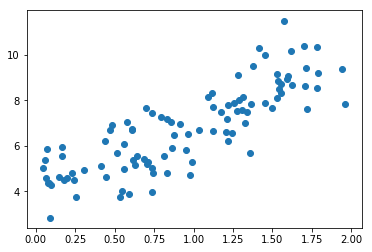

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.show()

In [11]:
X_b = np.c_[np.ones((100,1)), X] 
# add x0 = 1 to each instance
theta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_hat

array([[ 4.03871615],
       [ 2.87293998]])

In [12]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_hat)
y_predict

array([[ 4.03871615],
       [ 9.78459611]])

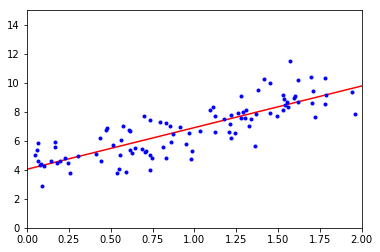

In [13]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 4.03871615]), array([[ 2.87293998]]))

In [15]:
lin_reg.predict(X_new)

array([[ 4.03871615],
       [ 9.78459611]])

In [16]:
# the normal equation get very slow when the number of features grows large (e.g., 100,000)

In [17]:
# Gradient Descent

In [18]:
# Warning: when using Gradient Descent you should ensure that all features have a similar scale to optimize convergence time

In [19]:
# Here are three types of Gradient Descent: Batch, Stochastic, and Mini-Batch. Pros and cons of these and using the 
# normal equation are at the end.

In [20]:
# Batch Gradient Descent
# uses the whole batch of training data, so can be slow if that is large

In [21]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[ 4.03871615],
       [ 2.87293998]])

In [22]:
# Stochastic Gradient Descent
# picks a random instance in the training set at every step to compute gradients.
# decreasing the step size according to a learning schedule is called simulated annealing.

In [23]:
n_epochs = 50
m = len(X_b)
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
theta

array([[ 4.02478195],
       [ 2.8904048 ]])

In [25]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.08819618]), array([ 2.91946934]))

In [26]:
# Mini-batch Gradient Descent
# Instead of all of the training set or a single random instance from the training set, this takes a random sample of data
# to compute the gradient at each step. This allows for performance boost from hardware optimizations from GPUs built for
# matrix operations.

In [27]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 10, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        
theta

array([[ 4.03473099],
       [ 2.90958289]])

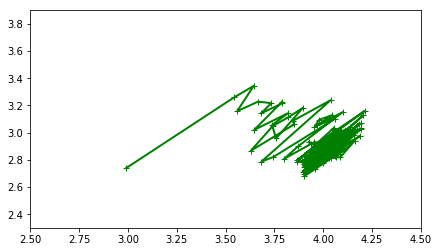

In [28]:
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

In [29]:
# Comparison of algorithms for Linear Regression

# Algorithm       | Large m |  Out-of-core support | Large n | Hyperparams | Scaling required | Scikit-Learn
# Normal Equation |  Fast   |         No           |  Slow   |     0       |       No         | LinearRegression
# Batch GD        |  Slow   |         No           |  Fast   |     2       |       Yes        |    n/a
# Stochastic GD   |  Fast   |         Yes          |  Fast   |     ≥2      |       Yes        |  SGDRegressor
# Mini-batch GD   |  Fast   |         Yes          |  Fast   |     ≥2      |       Yes        |    n/a

In [30]:
# Polynomial Regression

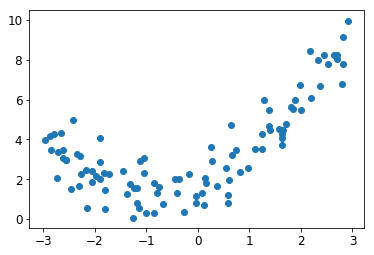

In [43]:
m = 100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X,y)
plt.show()

In [44]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [45]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [46]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 1.78134581]), array([[ 0.93366893,  0.56456263]]))

In [40]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

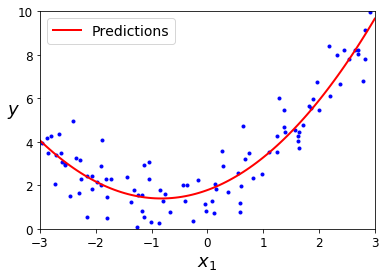

In [47]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
# save_fig("quadratic_predictions_plot")
plt.show()

In [48]:
# degree creep can cause overfitting of training data. use cross-validation metrics to help or look at the learning curve progressions

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

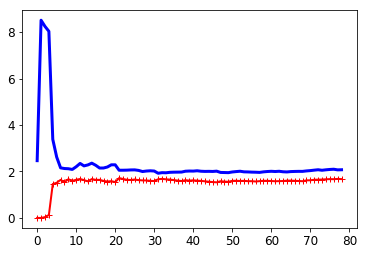

In [50]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)